
A Chatbot is an application(software) that is used to manage an online chat conversation through text or text to speech format. Most of the chatbots are accessed online through various websites or assistances(virtual) with a popup.

Examples:- E-commerce websites, health, news, etc.


Data and Libraries
We need the following components to be required for running our chatbot.

1. train_chatbot.py:- coding for reading natural language text/data into the training set. Also, we are using a sequential neural network to create a model using Keras.

2. chat_gui.py:- code for creating a graphical user interface for a chatbot.

3. classes.pkl:- here is the list of various types of classes of responses.

4. word.pkl:- here is the list of various words which is used for pattern recognition.

5. intent.json:- list of javascript objects which have different tags with respect to word patterns.

6. chatbot_model.h5:- whatever model we have created in train_chatbot.py and chat_gui.py is saved in.h5.

In [ ]:
import nltk
nltk.download('punkt')
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
import json
import pickle

import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from keras.optimizers import SGD
import random

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
nltk.download('all') # downloads all the datasets and models available in the NLTK library. NLTK (Natural Language Toolkit) is a powerful Python library for working with human language data.
import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_ru is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package basque_grammars is already up-to-date!
[nltk_data]    | Downloading package bcp47 to /root/nltk_data...
[nltk_data]    |   Package bcp47 is already up-to-dat

Certainly! Let me explain the first two points:

1. **NLTK Setup:**
   - `nltk.download('punkt')`: This line downloads the Punkt tokenizer models from NLTK. The Punkt tokenizer is a pre-trained unsupervised machine learning model for tokenization. Tokenization involves breaking down a text into individual words or tokens.
   - `nltk.download('wordnet')`: This line downloads the WordNet lexical database from NLTK. WordNet is a lexical database of the English language that relates words to one another in terms of synonyms, hypernyms, hyponyms, and more.
  
   In summary, these downloads provide the necessary tools for tokenizing sentences and lemmatizing words in the English language, which are common preprocessing steps in natural language processing.

2. **Lemmatization:**
   - `from nltk.stem import WordNetLemmatizer`: This line imports the WordNetLemmatizer class from NLTK, which is used for lemmatizing words. Lemmatization is the process of reducing words to their base or root form. For example, "running" becomes "run," and "better" becomes "good."

   By using these tools, the code is setting up the capability to process and understand the structure of the English language, which is essential for building a chatbot that can understand and generate human-like responses.

Initialize Training of Chatbot
# Now here we are going to initialize all the lists where we can store our natural language data/text.

Intents Example:
For example, consider the following user messages:

User: "What's the weather like today?"

Intent: Weather Inquiry
User: "Order a large pizza with extra cheese."

Intent: Pizza Ordering
User: "Tell me a joke."

Intent: Joke Request

In [ ]:
import json
import nltk
from google.colab import files

# Upload your Kaggle API key (kaggle.json) file
uploaded = files.upload()

# Move the uploaded Kaggle API key to the required directory
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/

# Set permissions for the Kaggle API key
!chmod 600 ~/.kaggle/kaggle.json

# Install the Kaggle library
!pip install kaggle

# Download the dataset from Kaggle
!kaggle datasets download -d niraliivaghani/chatbot-dataset

# Unzip the downloaded dataset
!unzip -q chatbot-dataset.zip -d chatbot-dataset


Saving kaggle.json to kaggle.json
  0% 0.00/4.57k [00:00<?, ?B/s]
100% 4.57k/4.57k [00:00<00:00, 9.69MB/s]


In [ ]:
# Load the intents from the downloaded file
data_file_path = '/content/chatbot-dataset/intents.json'
data_file = open(data_file_path).read()
intents = json.loads(data_file)

In [ ]:
# Rest of your code
words = []
classes = []
documents = []
ignore_words = ['?', '!']

In [ ]:
intents.keys()

dict_keys(['intents'])

In [ ]:
intents['intents'][:5]

[{'tag': 'greeting',
  'patterns': ['Hi',
   'How are you?',
   'Is anyone there?',
   'Hello',
   'Good day',
   "What's up",
   'how are ya',
   'heyy',
   'whatsup',
   '??? ??? ??'],
  'responses': ['Hello!',
   'Good to see you again!',
   'Hi there, how can I help?'],
  'context_set': ''},
 {'tag': 'goodbye',
  'patterns': ['cya',
   'see you',
   'bye bye',
   'See you later',
   'Goodbye',
   'I am Leaving',
   'Bye',
   'Have a Good day',
   'talk to you later',
   'ttyl',
   'i got to go',
   'gtg'],
  'responses': ['Sad to see you go :(',
   'Talk to you later',
   'Goodbye!',
   'Come back soon'],
  'context_set': ''},
 {'tag': 'creator',
  'patterns': ['what is the name of your developers',
   'what is the name of your creators',
   'what is the name of the developers',
   'what is the name of the creators',
   'who created you',
   'your developers',
   'your creators',
   'who are your developers',
   'developers',
   'you are made by',
   'you are made by whom',
   'who

Preprocess data
Before creating a machine learning or deep learning model when working with text data, there are a number of preprocessing steps that must be taken. We need to preprocess the data using a variety of processes depending on the needs.

The simplest and initial action you can do with text data is to tokenize it. The method of tokenizing involves dividing the entire text into smaller units, such as words.

Using the nltk.word_tokenize() method, we tokenize the phrase in this case and attach each word from the words list after iterating over the patterns. For our tags, we also make a list of classes.

In [ ]:
for intent in intents['intents']:
    for pattern in intent['patterns']:
        #tokenize each word
        w = nltk.word_tokenize(pattern)
        words.extend(w)
        #add documents in the corpus
        documents.append((w, intent['tag']))
        # add to our classes list
        if intent['tag'] not in classes:
            classes.append(intent['tag'])

We will now lemmatize each word and eliminate any repetitions from the list. Lemmatizing entails taking a word and changing it into a lemma. After that, a pickle file is made to house the Python objects that will be used for prediction.

In [ ]:
#Lemmatization: It lemmatizes each word in the list of words, converting them to their base or root form. This step helps in reducing words to their base form, making it easier for the model to recognize patterns.

words = [lemmatizer.lemmatize(w.lower()) for w in words if w not in ignore_words]

words = sorted(list(set(words))) #It sorts the lemmatized words alphabetically and removes duplicates, creating a unique vocabulary for the chatbot.

# sort classes
classes = sorted(list(set(classes))) # It sorts the classes (intents) alphabetically and removes duplicates.

# documents = combination between patterns and intents
print (len(documents), "documents") #Prints the number of documents (combinations of patterns and intents) in the dataset.

# classes = intents
print (len(classes), "classes", classes)#Prints the number of unique classes (intents) in the dataset.

# words = all words, vocabulary
print (len(words), "unique lemmatized words", words) #Prints the number of unique lemmatized words (vocabulary) in the dataset.


405 documents
38 classes ['admission', 'canteen', 'college intake', 'committee', 'computerhod', 'course', 'creator', 'document', 'event', 'extchod', 'facilities', 'fees', 'floors', 'goodbye', 'greeting', 'hod', 'hostel', 'hours', 'infrastructure', 'ithod', 'library', 'location', 'menu', 'name', 'number', 'placement', 'principal', 'ragging', 'random', 'salutaion', 'scholarship', 'sem', 'sports', 'swear', 'syllabus', 'task', 'uniform', 'vacation']
263 unique lemmatized words ["'s", '(', ')', 'a', 'about', 'ac', 'active', 'activity', 'address', 'admision', 'admission', 'against', 'ai/ml', 'allotment', 'am', 'an', 'and', 'antiragging', 'any', 'anyone', 'are', 'as', 'asshole', 'at', 'attend', 'automobile', 'available', 'average', 'be', 'between', 'big', 'bitch', 'book', 'boy', 'branch', 'bring', 'building', 'by', 'bye', 'cafetaria', 'call', 'called', 'campus', 'can', 'canteen', 'capacity', 'case', 'casuals', 'ce', 'chatting', 'chemical', 'civil', 'code', 'college', 'come', 'committe', 'comm

Create training and testing data
Now that the training data has been created, the input and output will be included. The pattern will serve as our input, and the class to which the pattern belongs will serve as our output. However, since the machine cannot interpret language, we must convert it to numbers.

In [ ]:
# create our training data
training = [] #Initializes an empty list (training) to store the training data.

# create an empty array for our output
output_empty = [0] * len(classes) #Creates an empty list (output_empty) filled with zeros, where the length of the list is the number of classes.

# training set, bag of words for each sentence
for doc in documents: #Iterates over each document in the documents list.

    # initialize our bag of words
    bag = [] #Initializes an empty list (bag) to represent the bag of words for the current sentence.

    # list of tokenized words for the pattern
    pattern_words = doc[0] #Retrieves the tokenized words for the current pattern from the document.

    # lemmatize each word - create base word, in attempt to represent related words
    pattern_words = [lemmatizer.lemmatize(word.lower()) for word in pattern_words] #Lemmatizes each word in the pattern, converting it to its base form.

    # create our bag of words array with 1, if word match found in current pattern
    for w in words:
        bag.append(1) if w in pattern_words else bag.append(0) #Appends 1 to the bag list if the word from the vocabulary is present in the current pattern, otherwise appends 0.

    # output is a '0' for each tag and '1' for current tag (for each pattern)
    output_row = list(output_empty) #Creates a list (output_row) by copying the output_empty list.
    output_row[classes.index(doc[1])] = 1 #Sets the value at the index corresponding to the class of the current document to 1 in the output_row.

    training.append([bag, output_row]) #Appends a list to the training list, where the first element is the bag of words (bag) and the second element is the output row (output_row).

# shuffle our features and turn into np.array
random.shuffle(training) #Shuffles the training data randomly to ensure that the model doesn't learn patterns based on the order of the data.
training = np.array(training) #Converts the training list to a NumPy array for further processing.

# create train and test lists. X - patterns, Y - intents
#Separates the features (train_x, bag of words) and labels (train_y, intents) from the training data.
train_x = list(training[:,0])
train_y = list(training[:,1])
print("Training data created")

Training data created


In [ ]:
# Creating model of 3 layers. First layer contains 128 neurons, second layer contains 64 neurons and 3rd output layer contains number of neurons
# equal to number of intents to predict output intent with softmax function
model = Sequential()
model.add(Dense(128, input_shape=(len(train_x[0]),), activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(len(train_y[0]), activation='softmax'))

# Compile model. And Stochastic gradient descent with Nesterov accelerated gradient gives good results for this model
sgd = SGD(learning_rate=0.01, momentum=0.9, nesterov=True)

model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])

#fitting and saving the model
hist = model.fit(np.array(train_x), np.array(train_y), epochs=200, batch_size=16, verbose=1)
model.save('chatbot_model.h5', hist)

# Save words and classes
pickle.dump(words, open('/content/chatbot-dataset/words.pkl', 'wb'))
pickle.dump(classes, open('/content/chatbot-dataset/classes.pkl', 'wb'))

print("model created")


Epoch 1/200
26/26 [==============================] - 1s 4ms/step - loss: 3.6423 - accuracy: 0.0395
Epoch 2/200
26/26 [==============================] - 0s 5ms/step - loss: 3.5650 - accuracy: 0.0691
Epoch 3/200
26/26 [==============================] - 0s 4ms/step - loss: 3.4921 - accuracy: 0.0988
Epoch 4/200
26/26 [==============================] - 0s 5ms/step - loss: 3.4628 - accuracy: 0.0914
Epoch 5/200
26/26 [==============================] - 0s 4ms/step - loss: 3.3889 - accuracy: 0.1284
Epoch 6/200
26/26 [==============================] - 0s 4ms/step - loss: 3.3371 - accuracy: 0.1309
Epoch 7/200
26/26 [==============================] - 0s 4ms/step - loss: 3.2486 - accuracy: 0.1679
Epoch 8/200
26/26 [==============================] - 0s 3ms/step - loss: 3.1253 - accuracy: 0.1975
Epoch 9/200
26/26 [==============================] - 0s 2ms/step - loss: 3.0279 - accuracy: 0.2000
Epoch 10/200
26/26 [==============================] - 0s 3ms/step - loss: 2.9266 - accuracy: 0.2346
Epoch 11/

So we ready with our training and test data, we will use a deep learning model from Keras called the Sequential model.

Once the model is trained, the whole data is turned into a numpy array and it gets saved as chatbot_model.h5.

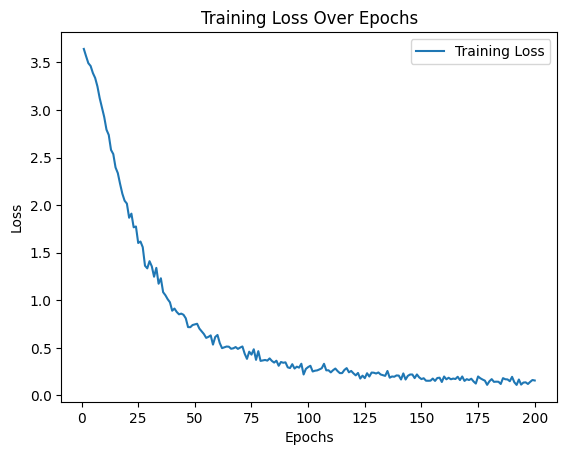

In [ ]:
import matplotlib.pyplot as plt

# Assuming hist is the history object obtained during training
loss_values = hist.history['loss']
epochs = range(1, len(loss_values) + 1)

# Plotting the loss curve
plt.plot(epochs, loss_values, label='Training Loss')
plt.title('Training Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
import os

# Check if words.pkl exists
words_file_path = '/content/chatbot-dataset/words.pkl'
if os.path.exists(words_file_path):
    words = pickle.load(open(words_file_path, 'rb'))
    print("Words loaded successfully.")
else:
    print(f"File {words_file_path} not found.")

# Check if classes.pkl exists
classes_file_path = '/content/chatbot-dataset/classes.pkl'
if os.path.exists(classes_file_path):
    classes = pickle.load(open(classes_file_path, 'rb'))
    print("Classes loaded successfully.")
else:
    print(f"File {classes_file_path} not found.")


Words loaded successfully.
Classes loaded successfully.


In [ ]:
from keras.models import load_model
import json
import numpy as np
import nltk
from nltk.stem import WordNetLemmatizer
import pickle

# Load the trained model
model = load_model('chatbot_model.h5')

# Load the intents file
intents = json.loads(open('/content/chatbot-dataset/intents.json').read())

# Load the words and classes
words = pickle.load(open('/content/chatbot-dataset/words.pkl', 'rb'))
classes = pickle.load(open('/content/chatbot-dataset/classes.pkl', 'rb'))

lemmatizer = WordNetLemmatizer()
ignore_words = ['?', '!']

def clean_up_sentence(sentence):
    sentence_words = nltk.word_tokenize(sentence)
    sentence_words = [lemmatizer.lemmatize(word.lower()) for word in sentence_words]
    return sentence_words

def bow(sentence, words, show_details=True):
    sentence_words = clean_up_sentence(sentence)
    bag = [0] * len(words)
    for s in sentence_words:
        for i, w in enumerate(words):
            if w == s:
                bag[i] = 1
                if show_details:
                    print("found in bag: %s" % w)
    return np.array(bag)

def predict_class(sentence, model):
    p = bow(sentence, words, show_details=False)
    res = model.predict(np.array([p]))[0]
    ERROR_THRESHOLD = 0.5  # Adjust the threshold based on your model's performance
    results = [[i, r] for i, r in enumerate(res) if r > ERROR_THRESHOLD]
    results.sort(key=lambda x: x[1], reverse=True)
    return_list = []
    for r in results:
        return_list.append({"intent": classes[r[0]], "probability": str(r[1])})
    return return_list

def get_response(ints, intents_json):
    tag = ints[0]['intent']
    list_of_intents = intents_json['intents']
    for i in list_of_intents:
        if i['tag'] == tag:
            result = np.random.choice(i['responses'])
            break
    return result

def chatbot_response(msg):
    ints = predict_class(msg, model)
    res = get_response(ints, intents)
    return res

# Example usage
user_input = "bye bye"
chatbot_response(user_input)


1/1 [==============================] - 0s 98ms/step


'Sad to see you go :('